In [1]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m1="CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv"
t1="CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv"
w1="CIC-IDS-2017/Wednesday-workingHours.pcap_ISCX.csv"
th1="CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
th2="CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
f1="CIC-IDS-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv"
f2="CIC-IDS-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
f3="CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"

dm1 = pd.read_csv(m1)
dt1 = pd.read_csv(t1)
dw1 = pd.read_csv(w1)
dth1 = pd.read_csv(th1)
dth2 = pd.read_csv(th2)
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)

In [3]:
df = pd.concat([dm1,dt1,dw1,dth1,dth2,df1, df2, df3], axis=0)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [4]:
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

class_names=le.classes_

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
params = {
    "objective": "multi:softmax",    # For classification
    "num_class": len(class_names),    # Number of unique classes
    "tree_method": "hist",           # Use GPU for tree building
    "device": "cuda",                # Use GPU acceleration
    'num_parallel_tree': 100,        # Number of trees
    "max_depth": 20,                  # Fraction of samples for training each tree
    "learning_rate": 0.1,            # Learning rate
    "random_state": 42               # Seed for reproducibility
}

In [9]:
rf_model = xgb.train(params, dtrain, num_boost_round=10)

In [10]:
y_pred = rf_model.predict(dtest)

c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.9988
Recall: 0.9988
F1 Score: 0.9988


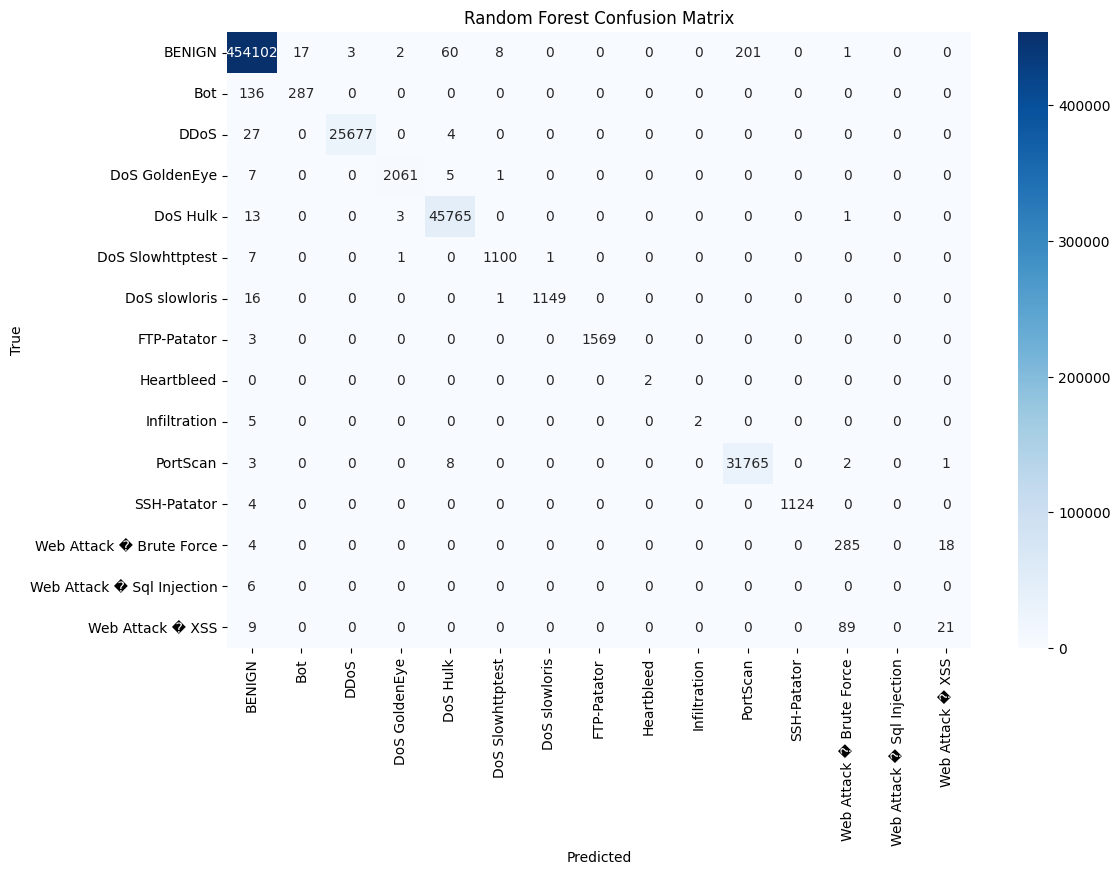


Classification Report:
                             precision    recall  f1-score   support

                    BENIGN   0.999472  0.999357  0.999415    454394
                       Bot   0.944079  0.678487  0.789546       423
                      DDoS   0.999883  0.998794  0.999338     25708
             DoS GoldenEye   0.997097  0.993732  0.995412      2074
                  DoS Hulk   0.998320  0.999629  0.998974     45782
          DoS Slowhttptest   0.990991  0.991885  0.991438      1109
             DoS slowloris   0.999130  0.985420  0.992228      1166
               FTP-Patator   1.000000  0.998092  0.999045      1572
                Heartbleed   1.000000  1.000000  1.000000         2
              Infiltration   1.000000  0.285714  0.444444         7
                  PortScan   0.993712  0.999559  0.996627     31779
               SSH-Patator   1.000000  0.996454  0.998224      1128
  Web Attack � Brute Force   0.753968  0.928339  0.832117       307
Web Attack � Sql Injec

c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=6,target_names=class_names))

In [12]:
rf_model.save_model("models/rf_d=15_lr=0.1_npt=100.model")

c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
